<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#工具包导入&amp;数据读取" data-toc-modified-id="工具包导入&amp;数据读取-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>工具包导入&amp;数据读取</a></span><ul class="toc-item"><li><span><a href="#工具包导入" data-toc-modified-id="工具包导入-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>工具包导入</a></span></li><li><span><a href="#数据读取" data-toc-modified-id="数据读取-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>数据读取</a></span></li></ul></li><li><span><a href="#基础数据信息观察" data-toc-modified-id="基础数据信息观察-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>基础数据信息观察</a></span><ul class="toc-item"><li><span><a href="#train数据集" data-toc-modified-id="train数据集-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>train数据集</a></span><ul class="toc-item"><li><span><a href="#基础统计信息" data-toc-modified-id="基础统计信息-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>基础统计信息</a></span></li><li><span><a href="#缺失值分析" data-toc-modified-id="缺失值分析-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>缺失值分析</a></span></li><li><span><a href="#数据每个字段的个数情况" data-toc-modified-id="数据每个字段的个数情况-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>数据每个字段的个数情况</a></span></li></ul></li><li><span><a href="#key数据集" data-toc-modified-id="key数据集-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>key数据集</a></span><ul class="toc-item"><li><span><a href="#基础统计信息" data-toc-modified-id="基础统计信息-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>基础统计信息</a></span></li><li><span><a href="#缺失值分析" data-toc-modified-id="缺失值分析-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>缺失值分析</a></span></li><li><span><a href="#数据每个字段的个数情况" data-toc-modified-id="数据每个字段的个数情况-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>数据每个字段的个数情况</a></span></li></ul></li></ul></li><li><span><a href="#小结" data-toc-modified-id="小结-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>小结</a></span></li></ul></div>

# 工具包导入&数据读取
## 工具包导入

In [1]:
import numpy as np
import pandas as pd
import os 
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import xgboost as xgb
import time
import datetime 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import gc

from scipy.signal import hilbert
from scipy.signal import hann
from scipy.signal import convolve
from scipy import stats
from sklearn.kernel_ridge import KernelRidge
 
from collections import Counter 
from statistics import mode 
    
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm
import json 
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from itertools import product
import ast 
tqdm.pandas()

/opt/conda/envs/zjpy36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 数据读取

In [2]:
path   = '/data/Data_JieZhang/Web/'
key    = pd.read_csv(path + 'key_1.csv')
train  = pd.read_csv(path + 'train_1.csv') 

# 基础数据信息观察
## train数据集
### 基础统计信息
1. train表单有609.8+M大小的数据；
2. 其中包含550个float64类型的数据；
3. 一共有145063条数据；

In [3]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [5]:
train.shape

(145063, 551)

### 缺失值分析
- 数据集中一共缺失了6192931个值;占比7.745%
- 网页越往后,缺失的值越少(因为很多网页起初是没有写上去,所以是没有流量的)

In [9]:
train.isnull().sum().sum()

6192931

In [10]:
train.isnull().sum().sum() / train.shape[0] / train.shape[1]

0.07747971020488964

In [8]:
train.isnull().sum()

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
2015-07-05    20659
2015-07-06    20483
2015-07-07    20664
2015-07-08    20294
2015-07-09    20244
2015-07-10    20342
2015-07-11    20525
2015-07-12    20485
2015-07-13    20399
2015-07-14    20140
2015-07-15    20106
2015-07-16    19987
2015-07-17    20048
2015-07-18    20295
2015-07-19    20142
2015-07-20    19979
2015-07-21    19688
2015-07-22    19573
2015-07-23    19581
2015-07-24    19593
2015-07-25    19589
2015-07-26    19865
2015-07-27    19759
2015-07-28    19553
2015-07-29    19347
              ...  
2016-12-02     4243
2016-12-03     3675
2016-12-04     4290
2016-12-05     4231
2016-12-06     4103
2016-12-07     4130
2016-12-08     3962
2016-12-09     4179
2016-12-10     3625
2016-12-11     3581
2016-12-12     3538
2016-12-13     3802
2016-12-14     4108
2016-12-15     4078
2016-12-16     3566
2016-12-17     3559
2016-12-18     3666
2016-12-19     3652
2016-12-20     3268


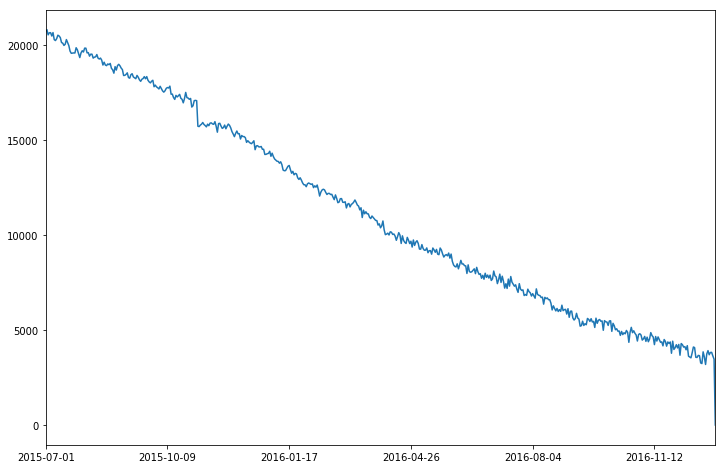

In [11]:
plt.figure(figsize=[12,8])
train.isnull().sum().sort_index().plot()

### 数据每个字段的个数情况
1. Page:有145063不同的值
2. 其他的都不一样

In [17]:
train.nunique()

Page          145063
2015-07-01      6898
2015-07-02      6823
2015-07-03      6707
2015-07-04      6995
2015-07-05      7299
2015-07-06      7275
2015-07-07      7105
2015-07-08      7024
2015-07-09      7026
2015-07-10      6948
2015-07-11      7037
2015-07-12      7563
2015-07-13      7427
2015-07-14      7316
2015-07-15      7077
2015-07-16      7126
2015-07-17      7045
2015-07-18      7035
2015-07-19      7362
2015-07-20      7313
2015-07-21      7083
2015-07-22      7006
2015-07-23      6875
2015-07-24      6709
2015-07-25      6720
2015-07-26      7074
2015-07-27      6972
2015-07-28      6831
2015-07-29      6763
               ...  
2016-12-02      8219
2016-12-03      8348
2016-12-04      8986
2016-12-05      8653
2016-12-06      8427
2016-12-07      8426
2016-12-08      8301
2016-12-09      8105
2016-12-10      8283
2016-12-11      8801
2016-12-12      8685
2016-12-13      8376
2016-12-14      8344
2016-12-15      8155
2016-12-16      7937
2016-12-17      8255
2016-12-18   

## key数据集
### 基础统计信息
1. key表单有132.8+M大小的数据；
2. 其中包含2个object类型的数据；
3. 一共有8703780条数据；

In [12]:
key.head()

,Page,Id
0,!vote_en.wikipedia.org_all-access_all-agents_2...,bf4edcf969af
1,!vote_en.wikipedia.org_all-access_all-agents_2...,929ed2bf52b9
2,!vote_en.wikipedia.org_all-access_all-agents_2...,ff29d0f51d5c
3,!vote_en.wikipedia.org_all-access_all-agents_2...,e98873359be6
4,!vote_en.wikipedia.org_all-access_all-agents_2...,fa012434263a


In [13]:
key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703780 entries, 0 to 8703779
Data columns (total 2 columns):
Page    object
Id      object
dtypes: object(2)
memory usage: 132.8+ MB


In [14]:
key.shape

(8703780, 2)

### 缺失值分析
- key数据集中不存在缺失值

In [15]:
key.isnull().sum()

Page    0
Id      0
dtype: int64

### 数据每个字段的个数情况
1. Page:有8703780不同的值
2. Id:有8703780个不同的值 

In [16]:
key.nunique()

Page    8703780
Id      8703780
dtype: int64

# 小结
本篇notebook对应EDA中的基础信息观察部分。